In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [5]:
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [4]:
# define state
class BlogState(TypedDict):

    topic: str
    outline: str
    content : str

In [6]:
def generate_outline(state:BlogState )-> BlogState:
    
    # extract the topic fromthe state
    topic = state['topic']

    # form a prompt
    prompt = f'Generate an outline on this topic {topic}'

    # generate outline 
    outline = model.invoke(prompt).content

    #update the outline
    state['outline'] = outline

    return state

def generate_blog(state:BlogState)-> BlogState:
    
    # extract tthe outlone
    outline = state['outline']

    # form a prompt
    prompt = f'Generate a blog on this outline {outline}'

    # ask that question to the llm
    blog = model.invoke(prompt).content

    #update the answer in the state
    state['blog'] = blog

    return state

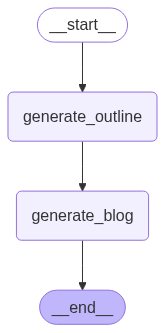

In [12]:
# create state

graph = StateGraph(BlogState)

# nodes
graph.add_node("generate_outline",generate_outline)
graph.add_node("generate_blog",generate_blog)

# edges
graph.add_edge(START, "generate_outline")
graph.add_edge("generate_outline", "generate_blog")
graph.add_edge("generate_blog", END)

# complie
workflow = graph.compile()
graph.compile()

In [ ]:
initial_state = {"topic": "citylife in bangalore"}
final_state = workflow.invoke(initial_state)

print(final_state)

{'topic': 'citylife in bangalore', 'outline': '## City Life in Bangalore: An Outline\n\n**I. Introduction**\n\n   *   A. Briefly introduce Bangalore as a major Indian city, highlighting its significance.\n   *   B. Thesis Statement: Bangalore\'s city life is a dynamic blend of traditional Indian culture and modern, global influences, characterized by its diverse population, booming IT industry, vibrant social scene, and persistent challenges related to infrastructure and cost of living.\n\n**II. The People and Culture**\n\n   *   A. Diverse Demographics:\n        *   1.  Origins and migration patterns of Bangalore\'s population (Kannadigas, migrants from other Indian states, international expats).\n        *   2.  Impact of this diversity on the city\'s culture.\n   *   B. Language and Traditions:\n        *   1.  Dominance of Kannada language and efforts to preserve it.\n        *   2.  Influence of other Indian languages (Hindi, Telugu, Tamil) and English.\n        *   3.  Festivals 

: 